# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

Business Issue:
In order to make statistically informed trades, we are looking at the growth of the S&P 500 stocks over the years and what exactly comprises the S&P 500 in terms of composition of various stocks and sectors.We will also attempt to answer the following queries:
 --1.Which are the top 5 companies in the S&P 500 based on market capitalisation and EBITDA?
 --2.Which sectors does the S&P 500 primarily constitute of?
 --3.How did the top 5 companies perform over the past 5 years?

Dataset
I am using the following dataset:
--https://www.kaggle.com/datasets/thedevastator/high-tech-companies-on-nasdaq
--https://www.kaggle.com/datasets/camnugent/sandp500
--https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

I will be using S&P 500 companies financial constituents as of 2022 dataset and latest stock prices from yahoo finance for the analysis.


S&P 500:
The Standard and Poor's 500 (the S&P 500)is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States.It is one of the most famous financial benchmark in the world.As of December 31, 2021, more than $7.1 trillion was invested in assets tied to the performance of this index.

About the data:
-The data consists of the following:
--1.Exchange -An open, organized marketplace where stocks, bonds, commodities, options and futures are traded
--2.Symbol-"Ticker". Unique code given to a company listed on the exchange
--3.Longname-Company's long name
--4.Sector-Sector of the Company
--5.Industry-Industry of the Company
--6.Currentprice-Most recent selling price of a stock
--7.Marketcap- Market value of the company's outstanding shares. Calculated using CurrentPrice × Outstandingshares
--8.Ebitda-It’s a profitability calculation that measures how profitable a company is before paying interest to creditors, taxes to the government, and taking paper expenses like depreciation and amortization.
EBITDA = NetIncome + Interest + Taxes + Depreciation + Amortization
--9.Revenuegrowth-Increase (or decrease) in a company’s sales from one period to the next.
(CurrentPeriodSales − PriorPeriodSales)/PriorPeriodSales
--10.Country-Company's country of origin
--11.Fulltimeemployees-Total full time employees in the company
--12.Weight-S&P 500 uses marketcap weighing method, where weight of each stock is calculated as Companymarkercap/Totalofallmarketcap
--13.High-Highest price of the stock touched the same day 
--14.Low-Lowest price the stock was traded on the same day
--15.Open-Opening price of that particular stock
--16.Close-Closing price of that particular stock
--17.Volume-Number of share traded that day



In [35]:
!pip install yfinance
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
from pandas.plotting import scatter_matrix
%matplotlib inline
df_nasdaq = pd.read_csv('2022_03_17_02_06_nasdaq.csv')
df_spc = pd.read_csv('sp500_companies.csv')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

## NASDAQ Companies

In [13]:
df_nasdaq.head()


,Unnamed: 0,symbol,name,price,pricing_changes,pricing_percentage_changes,sector,industry,market_cap,share_volume,earnings_per_share,annualized_dividend,dividend_pay_date,symbol_yield,beta,errors
0,0,AAPL,Apple Inc. Common Stock,157.510,+2.42,(+1.56%),Technology,Computer Manufacturing,"2,699,423,838,000","63,429,579",$6.04,$0.88,"Feb 10, 2022",0.58%,1.18,False
1,1,MSFT,Microsoft Corporation Common Stock,289.560,+2.41,(+0.84%),Technology,Computer Software: Prepackaged Software,"2,143,429,080,429","22,790,662",$9.39,$2.48,"Jun 9, 2022",0.9%,0.91,False
2,2,GOOG,Alphabet Inc. Class C Capital Stock,2639.755,+46.545,(+1.79%),Technology,Internet and Information Services,"1,724,718,735,878","900,760",$112.23,NaN,NaN,NaN,1.06,False
3,3,GOOGL,Alphabet Inc. Class A Common Stock,2629.010,+45.05,(+1.74%),Technology,Internet and Information Services,"1,718,961,675,672","1,008,687",$112.23,NaN,NaN,NaN,1.06,False
4,4,AMZN,"Amazon.com, Inc. Common Stock",3009.070,+61.74,(+2.09%),Consumer Services,Catalog/Specialty Distribution,"1,511,267,897,700","2,623,915",$64.78,NaN,NaN,NaN,1.11,False


In [14]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  8339 non-null   int64  
 1   symbol                      8339 non-null   object 
 2   name                        8339 non-null   object 
 3   price                       8339 non-null   float64
 4   pricing_changes             8339 non-null   object 
 5   pricing_percentage_changes  5990 non-null   object 
 6   sector                      6138 non-null   object 
 7   industry                    6156 non-null   object 
 8   market_cap                  6824 non-null   object 
 9   share_volume                7853 non-null   object 
 10  earnings_per_share          2921 non-null   object 
 11  annualized_dividend         2198 non-null   object 
 12  dividend_pay_date           2262 non-null   object 
 13  symbol_yield                3783 

In [15]:
#Check for missing values:
df_nasdaq.isnull().sum()
#Based on the EDA on NASDAQ dataset,I understand that there are many missing values which are important for the analysis
#and replacing them is challenging and time consuming so decided to use S&P 500 dataset.

Unnamed: 0                       0
symbol                           0
name                             0
price                            0
pricing_changes                  0
pricing_percentage_changes    2349
sector                        2201
industry                      2183
market_cap                    1515
share_volume                   486
earnings_per_share            5418
annualized_dividend           6141
dividend_pay_date             6077
symbol_yield                  4556
beta                          2241
errors                           0
dtype: int64

## S&P 500 Companies financial constituents

In [18]:
df_spc.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810


In [20]:
df_spc.shape
#There are 493 records and 16 columns.
#There should be 505 companies as part of s&p500.I will add missing companies financial constituents.

(493, 16)

In [21]:
df_spc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             493 non-null    object 
 1   Symbol               493 non-null    object 
 2   Shortname            493 non-null    object 
 3   Longname             493 non-null    object 
 4   Sector               493 non-null    object 
 5   Industry             493 non-null    object 
 6   Currentprice         493 non-null    float64
 7   Marketcap            493 non-null    int64  
 8   Ebitda               463 non-null    float64
 9   Revenuegrowth        492 non-null    float64
 10  City                 493 non-null    object 
 11  State                474 non-null    object 
 12  Country              493 non-null    object 
 13  Fulltimeemployees    491 non-null    float64
 14  Longbusinesssummary  493 non-null    object 
 15  Weight               493 non-null    flo

In [22]:
df_spc.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,493.000000,4.930000e+02,4.630000e+02,492.000000,4.910000e+02,493.000000
mean,162.398884,6.423573e+10,6.055417e+09,0.528150,5.540377e+04,0.002028
std,262.710729,1.588148e+11,1.305708e+10,3.837191,1.458281e+05,0.005015
min,8.500000,4.060800e+09,-4.011000e+09,-0.454000,1.050000e+02,0.000128
25%,58.250000,1.599014e+10,1.285896e+09,0.047000,9.514000e+03,0.000505
50%,102.500000,2.882696e+10,2.565300e+09,0.113000,1.930000e+04,0.000910
75%,193.070000,6.070308e+10,5.302000e+09,0.221250,5.315000e+04,0.001917
max,4360.020000,2.487210e+12,1.306340e+11,61.423000,2.300000e+06,0.078540


In [23]:
df_spc.isnull().sum()
#Columns with null values(missing data)-
# ebitda=30,
# Revenuegrowth=1,
# state=19,
# Fulltimeemployees=2
#Dropped state column because it is not required for the analysis.
#Replace with actual values for ebitda,Revenuegrowth and FulLtimeemployees.


Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 30
Revenuegrowth           1
City                    0
State                  19
Country                 0
Fulltimeemployees       2
Longbusinesssummary     0
Weight                  0
dtype: int64

In [84]:
#Drop data which is not required for the analysis:
df_spc_new = df_spc.drop(['Shortname','City','State','Longbusinesssummary'],axis = 1)
df_spc_new.head()
#Following columns will be useful for the analysis for our business issues.


,Exchange,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
0,NMS,AAPL,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,United States,154000.0,0.078540
1,NMS,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,United States,181000.0,0.059721
2,NMS,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,United States,99290.0,0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,United States,372000.0,0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,United States,350000.0,0.015810


In [82]:
# df_spc_new["Revenuegrowth"].fillna(0.113, inplace = True)
# df_spc_new[df_spc_new['Revenuegrowth'].isnull()]
# df_spc_new.info()
#df_spc_new.iloc[52]

In [83]:
#df_spc_new[df_spc_new['Fulltimeemployees'].isnull()]
# df_spc_new["Fulltimeemployees"].fillna("49000",inplace = True,limit=1)
#df_spc_new[df_spc_new['Fulltimeemployees'].isnull()]
# df_spc_new["Fulltimeemployees"].fillna("9700",inplace = True,limit=1)
#df_spc_new[df_spc_new['Fulltimeemployees'].isnull()]
# df_spc_new.iloc[144]
# df_spc_new.iloc[420]

In [78]:
df_spc_new[df_spc_new['Ebitda'].isnull()]
#All the null values for Ebitda are for financial sector.I will replace the missing values with actual values.

,Exchange,Symbol,Shortname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
9,NYQ,JPM,JP Morgan Chase & Co.,Financial Services,Banks—Diversified,113.42,343474307072,NaN,-0.197,United States,273948.0,0.010846
17,NYQ,BAC,Bank of America Corporation,Financial Services,Banks—Diversified,33.05,270483832832,NaN,-0.06,United States,208000.0,0.008541
34,NYQ,WFC,Wells Fargo & Company,Financial Services,Banks—Diversified,42.90,171052171264,NaN,-0.061,United States,246577.0,0.005401
46,NYQ,MS,Morgan Stanley,Financial Services,Capital Markets,80.79,144970383360,NaN,-0.058,United States,76541.0,0.004578
58,NYQ,AXP,American Express Company,Financial Services,Credit Services,149.83,116051730432,NaN,0.208,United States,64000.0,0.003665
59,NYQ,SCHW,Charles Schwab Corporation (The,Financial Services,Capital Markets,61.17,115647995904,NaN,-0.009,United States,34200.0,0.003652
62,NYQ,GS,"Goldman Sachs Group, Inc. (The)",Financial Services,Capital Markets,318.55,106261266432,NaN,-0.304,United States,45100.0,0.003355
64,NYQ,C,"Citigroup, Inc.",Financial Services,Banks—Diversified,51.40,101991481344,NaN,-0.091,United States,228000.0,0.003221
98,NYQ,USB,U.S. Bancorp,Financial Services,Banks—Regional,47.42,70314377216,NaN,-0.125,United States,70000.0,0.002220
104,NYQ,PNC,"PNC Financial Services Group, I",Financial Services,Banks—Regional,161.72,68349501440,NaN,0.027,United States,57668.0,0.002158


In [85]:
#Check for duplicates and remove if any:
df_spc_duplicates = df_spc[df_spc.duplicated()].sum()
df_spc_duplicates
#No duplicates

Exchange               0.0
Symbol                 0.0
Shortname              0.0
Longname               0.0
Sector                 0.0
Industry               0.0
Currentprice           0.0
Marketcap              0.0
Ebitda                 0.0
Revenuegrowth          0.0
City                   0.0
State                  0.0
Country                0.0
Fulltimeemployees      0.0
Longbusinesssummary    0.0
Weight                 0.0
dtype: float64

In [33]:
df_spc_new["Sector"].nunique()
#S&P 500 companies are from 11 different sectors.

11

In [117]:
df_spc_new["Sector"].value_counts()
#Technology and industrials sector have maximum count of companies.

Technology                72
Industrials               71
Financial Services        67
Healthcare                64
Consumer Cyclical         60
Consumer Defensive        36
Real Estate               31
Utilities                 28
Communication Services    23
Basic Materials           21
Energy                    20
Name: Sector, dtype: int64

In [140]:
df_spc_new["Exchange"].nunique()
#The s&p 500 companies are from 4 stock exchanges.

4

In [141]:
df_spc_new["Exchange"].value_counts()
#Maximum companies in S&P 500 are from new york stock exchange.

NYQ    349
NMS    142
NGM      1
BTS      1
Name: Exchange, dtype: int64

In [135]:
df_spc_new.sort_values('Marketcap', ascending=False).head(5)
#Top 5 companies based on Marketcap are apple,microsoft,tesla,berkshire and united health group.

,Exchange,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
0,NMS,AAPL,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,United States,154000.0,0.078540
1,NMS,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,United States,181000.0,0.059721
2,NMS,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,United States,99290.0,0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,United States,372000.0,0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,United States,350000.0,0.015810


In [138]:
df_spc_new.sort_values('Ebitda', ascending=False).head(5)
#Top 5 companies based on Ebitda are apple,berkshire,google and microsoft.
#There are some missing values.Cleaning the missing/Null values can give better results.

,Exchange,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
0,NMS,AAPL,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,United States,154000.0,0.078540
3,NYQ,BRK-B,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,United States,372000.0,0.020174
99,NMS,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,105.44,69982953472,9.584100e+10,0.230,United States,163906.0,0.002210
101,NMS,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,105.02,69712379904,9.584100e+10,0.230,United States,163906.0,0.002201
1,NMS,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,United States,181000.0,0.059721


In [139]:
df_spc_new.sort_values('Revenuegrowth', ascending=False).head(5)
#Top 5 companies based on Revenuegrowth are Carnival Corporation & plc,Norwegian Cruise Line Holdings Ltd.,
#Royal Caribbean Cruises Ltd.,Moderna, Inc.,Live Nation Entertainment, Inc.

,Exchange,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
450,NYQ,CCL,Carnival Corporation & plc,Consumer Cyclical,Travel Services,8.50,9908960256,-4.011000e+09,61.423,United States,40000.0,0.000313
491,NYQ,NCLH,Norwegian Cruise Line Holdings Ltd.,Consumer Cyclical,Travel Services,11.18,4660852736,-1.794137e+09,49.886,United States,34700.0,0.000147
472,NYQ,RCL,Royal Caribbean Cruises Ltd.,Consumer Cyclical,Travel Services,33.12,8438644736,-2.495455e+09,27.773,United States,84900.0,0.000266
110,NMS,MRNA,"Moderna, Inc.",Healthcare,Biotechnology,160.90,65236901888,1.352800e+10,11.629,United States,2700.0,0.002060
310,NYQ,LYV,"Live Nation Entertainment, Inc.",Communication Services,Entertainment,89.78,20169973760,-9.524000e+06,10.387,United States,10200.0,0.000637


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

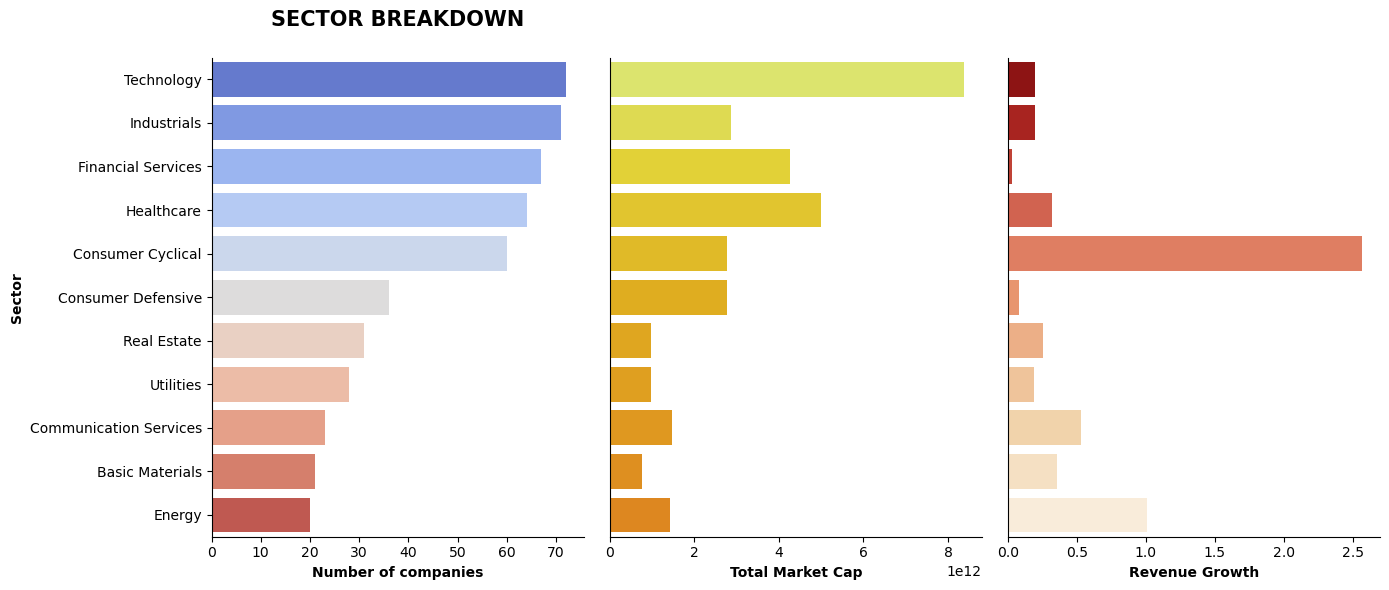

In [87]:
#Which is the leading sector in S&P 500?
df_spc_new.head(10)
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = df_spc_new.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette=('coolwarm'))
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('15')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette=('Wistia'))
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette=('OrRd_r'))
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

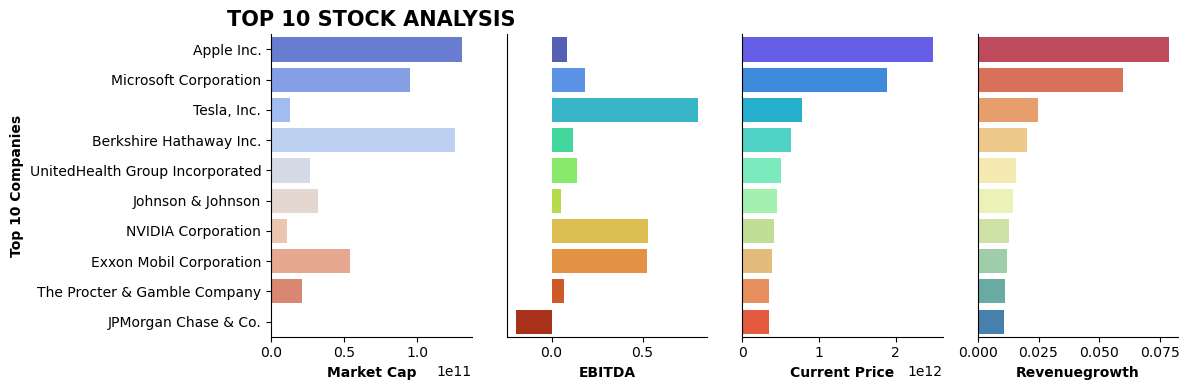

In [92]:
#Top 10 Stock's based on Market Cap, EBIDTA & Revenuegrowth Comparison
N = 10
fig2 = plt.figure(num=None, figsize=(12,4), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 4, 1)
ax1 = sns.barplot(x=df_spc_new.iloc[:N,7], y=df_spc_new.iloc[:N,2], data=df_spc_new, palette=('coolwarm'))
ax1.set_xlabel('Market Cap', weight='bold')
ax1.set_ylabel(f'Top {N} Companies', weight = 'bold')
ax1.set_title(f'TOP {N} STOCK ANALYSIS', weight='bold').set_fontsize('15')

plt.subplot(1, 4, 2)
ax2 = sns.barplot(x=df_spc_new.iloc[:N,8], y=df_spc_new.iloc[:N,2], data=df_spc_new, palette=('turbo'))
ax2.set_xlabel('EBITDA', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 3)
ax2 = sns.barplot(x=df_spc_new.iloc[:N,6], y=df_spc_new.iloc[:N,2], data=df_spc_new, palette=('rainbow'))
ax2.set_xlabel('Current Price', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 4)
ax2 = sns.barplot(x=df_spc_new.iloc[:N,11], y=df_spc_new.iloc[:N,2], data=df_spc_new, palette=('Spectral'))
ax2.set_xlabel('Revenuegrowth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

In [93]:
start = "2018-01-01"
end = '2023-01-01'
Apple = yf.download('AAPL',start,end)
Microsoft = yf.download('MSFT',start,end)
Tesla = yf.download('TSLA',start,end)
JP_Morgan = yf.download('JPM',start,end)
United_Health_Group = yf.download('UNH',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


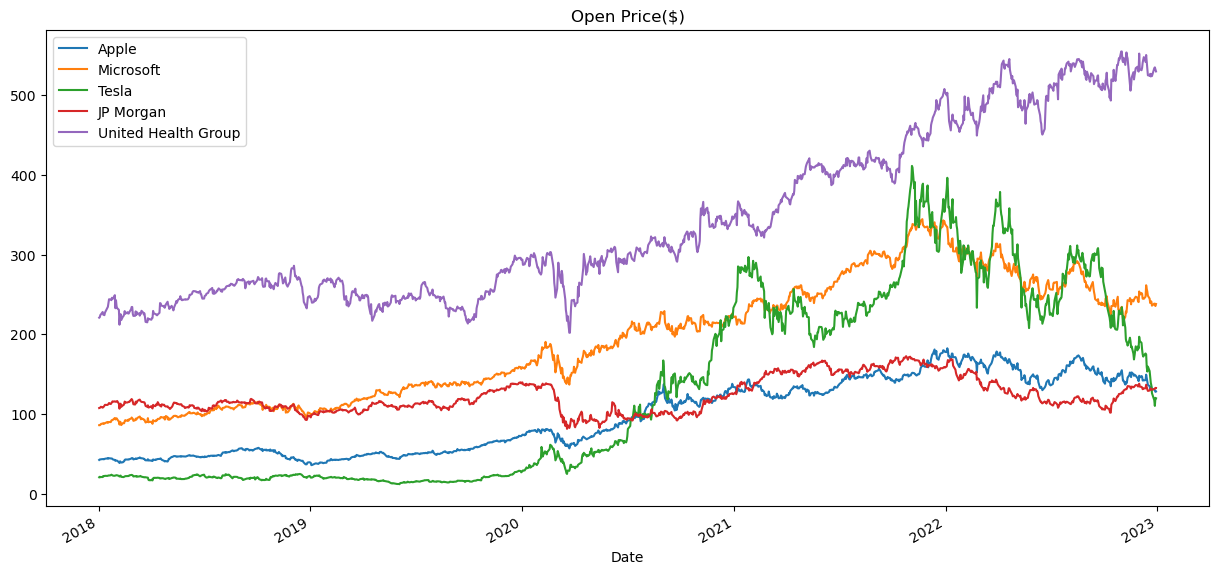

In [95]:
#Comparison of stock prices of apple,microsoft,tesla,United health group and JP morgan from top 10 stocks
Apple['Open'].plot(label = 'Apple', figsize = (15,7))
Microsoft['Open'].plot(label = 'Microsoft')
Tesla['Open'].plot(label = 'Tesla')
JP_Morgan['Open'].plot(label = 'JP Morgan')
United_Health_Group['Open'].plot(label = 'United Health Group')
plt.title('Open Price($)')
plt.legend()

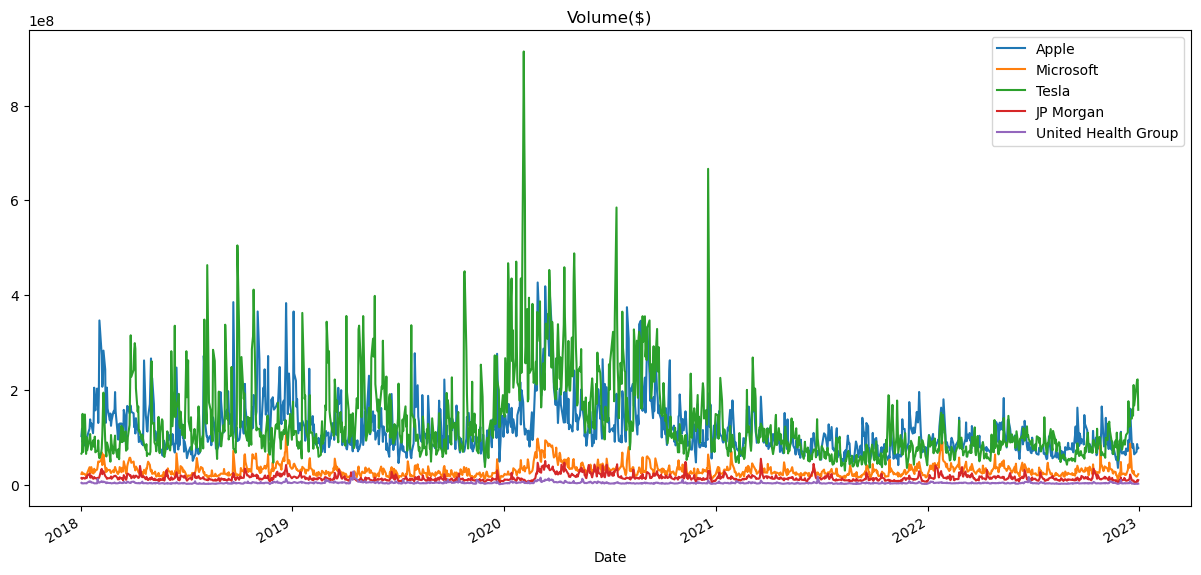

In [100]:
#Comparison of volumes of stock traded for apple,microsoft,tesla,United health group and JP morgan from top 10 stocks.
Apple['Volume'].plot(label = 'Apple', figsize = (15,7))
Microsoft['Volume'].plot(label = 'Microsoft')
Tesla['Volume'].plot(label = 'Tesla')
JP_Morgan['Volume'].plot(label = 'JP Morgan')
United_Health_Group['Volume'].plot(label = 'United Health Group')
plt.title('Volume($)')
plt.legend()

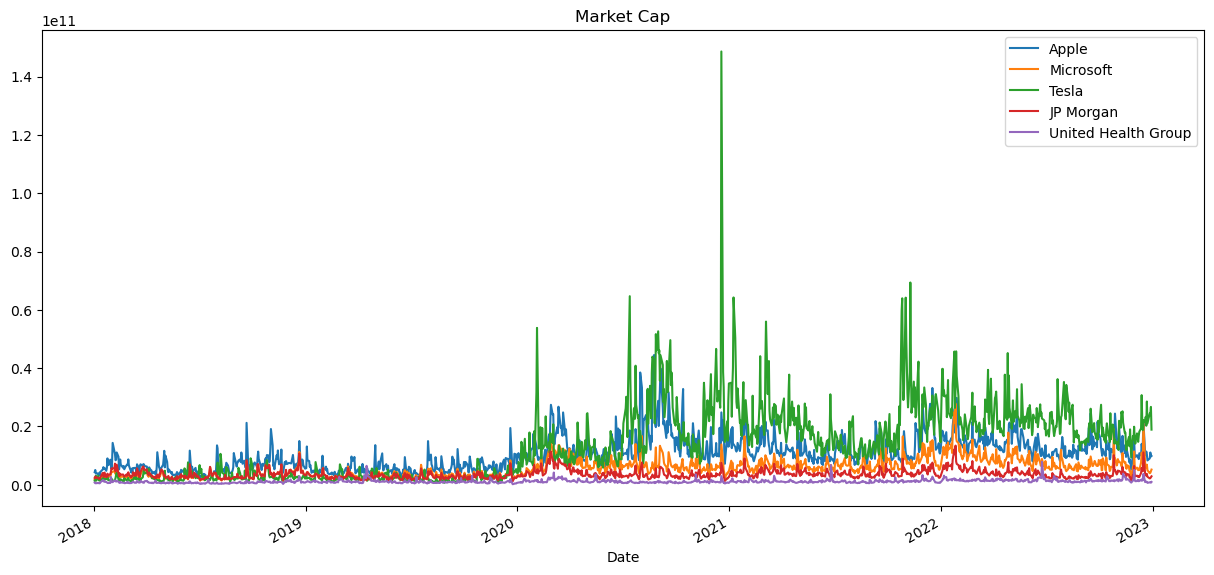

In [97]:
#Comaprison of Market Capitalisation of apple,microsoft,tesla,United health group and JP morgan from top 10 stocks.
Apple['MarktCap'] = Apple['Open'] * Apple['Volume']
Microsoft['MarktCap'] = Microsoft['Open'] * Microsoft['Volume']
Tesla['MarktCap'] = Tesla['Open'] * Tesla['Volume']
JP_Morgan['MarktCap'] = JP_Morgan['Open'] * Microsoft['Volume']
United_Health_Group['MarktCap'] = United_Health_Group['Open'] * United_Health_Group['Volume']
Apple['MarktCap'].plot(label = 'Apple', figsize = (15,7))
Microsoft['MarktCap'].plot(label = 'Microsoft')
Tesla['MarktCap'].plot(label = 'Tesla')
JP_Morgan['MarktCap'].plot(label = 'JP Morgan')
United_Health_Group['MarktCap'].plot(label = 'United Health Group')
plt.title('Market Cap')
plt.legend()

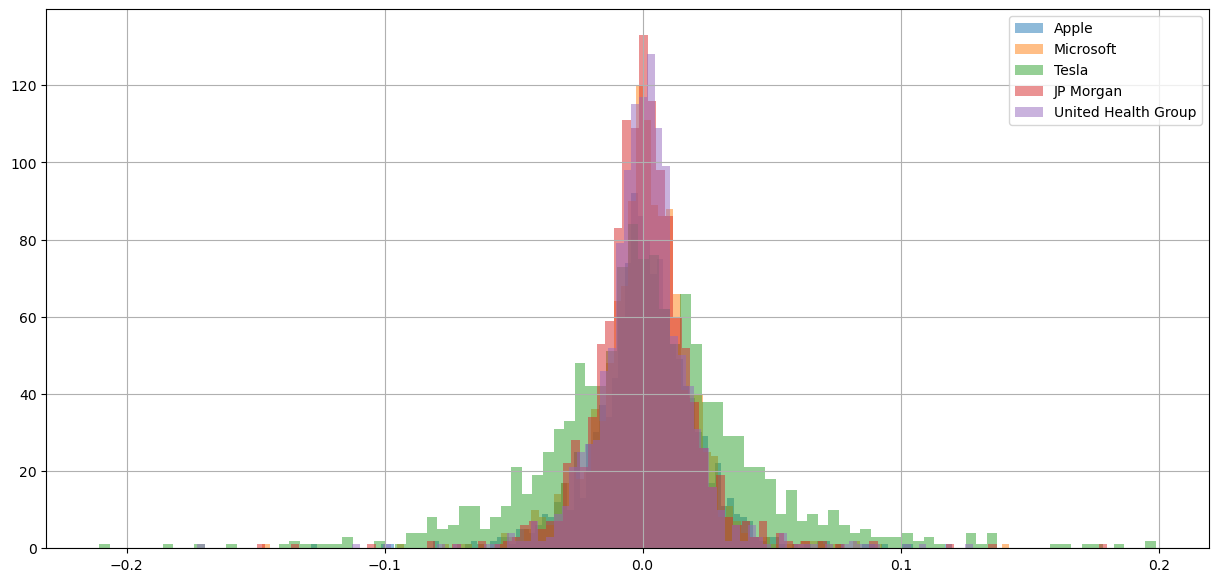

In [99]:
#Comparison of volatility of apple,microsoft,tesla,United health group and JP morgan from top 10 stocks.
# The bigger the %increase in stock value higher the volatile the stock is.
Apple['returns'] = (Apple['Close']/Apple['Close'].shift(1)) -1
Microsoft['returns'] = (Microsoft['Close']/Microsoft['Close'].shift(1))-1
Tesla['returns'] = (Tesla['Close']/Tesla['Close'].shift(1)) - 1
JP_Morgan['returns'] = (JP_Morgan['Close']/JP_Morgan['Close'].shift(1)) - 1
United_Health_Group['returns'] = (United_Health_Group['Close']/United_Health_Group['Close'].shift(1)) - 1
Apple['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))
Microsoft['returns'].hist(bins = 100, label = 'Microsoft', alpha = 0.5)
Tesla['returns'].hist(bins = 100, label = 'Tesla', alpha = 0.5)
JP_Morgan['returns'].hist(bins = 100, label = 'JP Morgan', alpha = 0.5)
United_Health_Group['returns'].hist(bins = 100, label = 'United Health Group', alpha = 0.5)
plt.legend()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?Yes,finding latest stock related data was very challenging.There are many missing values and its important to find actual data for our analysis.
2. Do you have any concerns about your dataset? NASDAQ data has too many missing data and it was very challenging to get accurate data so I will be using data from S&P 500 for the year 2022.I have a concern on the missing values whether replaced or removed it may or may not affect our analysis.I have imported yahoo finance to get the latest prices for top 5 stocks.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?Main process in cleaning data will be working with the missing value/replaced values.The insight changes once the data is cleaned.There are no duplicates.
